In [1]:
# imports

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [9]:
# Hyperparameters

num_classes = 10
batch_size = 128
epochs = 12

In [10]:
# Image Resolution

img_rows, img_cols = 28, 28

# Loading the data.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# Creating the Model 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
# Training the Model

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 83s 177ms/step - loss: 2.2885 - accuracy: 0.1438 - val_loss: 2.2518 - val_accuracy: 0.3948
Epoch 2/12
469/469 [==============================] - 88s 188ms/step - loss: 2.2287 - accuracy: 0.2826 - val_loss: 2.1782 - val_accuracy: 0.5265
Epoch 3/12
469/469 [==============================] - 90s 192ms/step - loss: 2.1496 - accuracy: 0.3920 - val_loss: 2.0742 - val_accuracy: 0.6028
Epoch 4/12
469/469 [==============================] - 89s 190ms/step - loss: 2.0380 - accuracy: 0.4654 - val_loss: 1.9277 - val_accuracy: 0.6610
Epoch 5/12
469/469 [==============================] - 88s 188ms/step - loss: 1.8892 - accuracy: 0.5198 - val_loss: 1.7382 - val_accuracy: 0.7037
Epoch 6/12
469/469 [==============================] - 89s 189ms/step - loss: 1.7107 - accuracy: 0.5661 - val_loss: 1.5190 - val_accuracy: 0.7412
Epoch 7/12
469/469 [==============================] - 92s 196ms/step - loss: 1.5234 - accuracy: 0.6050 - val_loss: 1.3014 - val_ac

In [9]:
# Evaluating the Predictions on the Model

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6946696043014526
Test accuracy: 0.8411999940872192


In [10]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [13]:
from tensorflow.keras.models import model_from_json

# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Loaded Model from disk


In [14]:
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6946696043014526
Test accuracy: 0.8411999940872192


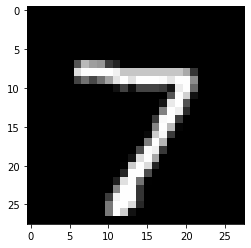

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28,28)*255,cmap='gray', vmin=0, vmax=255)
plt.show()

In [24]:
loaded_model.predict(x_test[0:4])

array([[6.55462267e-03, 3.36487428e-03, 5.87403309e-03, 2.15140507e-02,
        1.09246839e-02, 6.07993733e-03, 1.79236836e-03, 9.06048000e-01,
        7.31139770e-03, 3.05360183e-02],
       [2.33119298e-02, 2.65770685e-02, 6.40145421e-01, 9.74861160e-02,
        4.46961465e-04, 5.24875745e-02, 1.22624844e-01, 6.82173064e-04,
        3.42229158e-02, 2.01496971e-03],
       [7.55006541e-03, 7.67176032e-01, 5.39401509e-02, 2.46638674e-02,
        1.14143193e-02, 1.69201437e-02, 2.71754935e-02, 2.54876036e-02,
        3.33299041e-02, 3.23423855e-02],
       [8.00036252e-01, 3.65308224e-04, 7.42191309e-03, 3.17574665e-02,
        1.79796689e-03, 5.57084046e-02, 8.03282037e-02, 1.10101746e-02,
        5.58457244e-03, 5.98974340e-03]], dtype=float32)

In [35]:
import numpy as np
p = np.argmax(loaded_model.predict(x_test[0:4]),axis=-1)
print(str(p[0]))

7


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


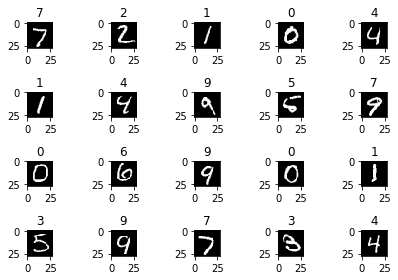

In [41]:
rows = 4
cols = 5
plt.subplot(rows,cols,1)
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(x_test[i].reshape(28,28)*255,cmap='gray', vmin=0, vmax=255)
    prediction = str(np.argmax(loaded_model.predict(x_test[i:i+1])))
    plt.title(prediction)
plt.tight_layout()
plt.show()    

In [45]:
# an optimized model
from keras.layers import BatchNormalization

j = 0
model = list()
model.append(Sequential())

model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [47]:
model[0].fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 127s 270ms/step - loss: 0.2403 - accuracy: 0.9263 - val_loss: 0.0920 - val_accuracy: 0.9721
Epoch 2/12
469/469 [==============================] - 146s 311ms/step - loss: 0.0641 - accuracy: 0.9806 - val_loss: 0.0312 - val_accuracy: 0.9889
Epoch 3/12
469/469 [==============================] - 153s 327ms/step - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.0227 - val_accuracy: 0.9922
Epoch 4/12
469/469 [==============================] - 147s 313ms/step - loss: 0.0404 - accuracy: 0.9882 - val_loss: 0.0265 - val_accuracy: 0.9921
Epoch 5/12
469/469 [==============================] - 153s 326ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0228 - val_accuracy: 0.9925
Epoch 6/12
469/469 [==============================] - 145s 309ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0249 - val_accuracy: 0.9927
Epoch 7/12
469/469 [==============================] - 148s 315ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0224 -

In [49]:
model_json1 = model[0].to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model[0].save_weights("model1.h5")

In [50]:
json_file = open('model1.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model1.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Loaded Model from disk
Test loss: 0.02480912394821644
Test accuracy: 0.9926999807357788


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


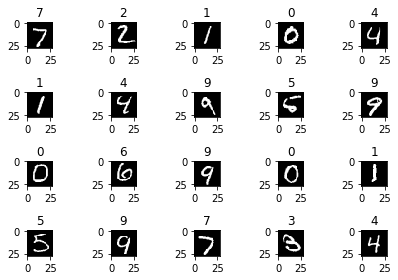

In [51]:
rows = 4
cols = 5
plt.subplot(rows,cols,1)
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(x_test[i].reshape(28,28)*255,cmap='gray', vmin=0, vmax=255)
    prediction = str(np.argmax(loaded_model.predict(x_test[i:i+1])))
    plt.title(prediction)
plt.tight_layout()
plt.show()  

In [52]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)       

In [57]:
loaded_model.layers[0]